In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
DATA_FOLDER = "G:\\My Drive\\Gdrive\\startup\\Novus Sentry\\data\\Data_load_v2"
COLUMN_NAMES = ["time", "i1"]

In [37]:
def read_all_files_in_folder_load(folder_name: str):
  path = folder_name
  file_list = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".csv")]
  df_list = []
  for fname in file_list:
    print(fname)
    df = pd.read_csv(fname, header=2, sep='\t')
    #print(df)
    #df = df.dropna(axis=1, how='all')
    df_list.append(df.iloc[:,[0,2]].copy())
    df_list.append(df.iloc[:,[0,5]].copy())
  return df_list, file_list


In [38]:
df_list, file_list = read_all_files_in_folder_load(DATA_FOLDER)
df_list

NS_DEV2_2ma loaded_Nov322_815AM.csv
NS_DEV2_1ma loaded_Nov222_448PM.csv


[       Time (S)  Current Ch1
 0           0.0     0.001027
 1           1.0     0.001036
 2           2.0     0.001033
 3           3.0     0.001033
 4           4.0     0.001027
 ...         ...          ...
 43046   43078.0     0.001987
 43047   43079.0     0.002290
 43048   43080.0     0.002200
 43049   43081.0     0.002174
 43050   43082.0     0.002087
 
 [43051 rows x 2 columns],
        Time (S)  Current Ch2
 0           0.0     0.001010
 1           1.0     0.001017
 2           2.0     0.001010
 3           3.0     0.001017
 4           4.0     0.001004
 ...         ...          ...
 43046   43078.0     0.002042
 43047   43079.0     0.002638
 43048   43080.0     0.001684
 43049   43081.0     0.001878
 43050   43082.0     0.002297
 
 [43051 rows x 2 columns],
        Time (S)  Current Ch1
 0           0.0     0.001014
 1           1.0     0.001027
 2           2.0     0.001020
 3           3.0     0.001030
 4           4.0     0.001014
 ...         ...          ...
 16448   165

NS_DEV2_2ma loaded_Nov322_815AM.csv
NS_DEV2_1ma loaded_Nov222_448PM.csv
True
2739.0
True
7713.0
True
2643.0
True
11862.0


C:\Users\janak\AppData\Local\Temp\ipykernel_25712\1347124368.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1] -= I_load[i]
C:\Users\janak\AppData\Local\Temp\ipykernel_25712\1347124368.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  czcp = df.iloc[(df.iloc[:,1]).abs().argsort()[:1].item(), 0]
C:\Users\janak\AppData\Local\Temp\ipykernel_25712\1347124368.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

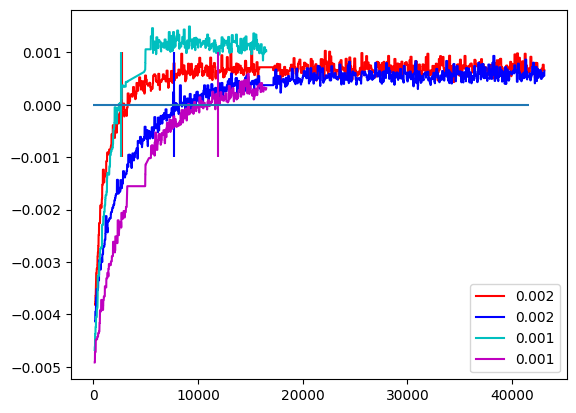

In [39]:
df_list, file_list = read_all_files_in_folder_load(DATA_FOLDER)
colors = ['r', 'b', 'c', 'm', 'y', 'k', 'g']
I_load = [0.002,0.002 , 0.001 , 0.001 ]
max_x = 0

for i, df in enumerate(df_list):
    print((df.iloc[:,1]==0).any())
    df = df.loc[~(df.iloc[:,1]==0)]
    df.iloc[:,1] -= I_load[i]
    N = df.iloc[:,1].argmin()
    df = df.iloc[N:,:]
    #print(df)
    #df.iloc[:,1] -= df.iloc[:,1].mean()
    df.iloc[:,1] = df.iloc[:,1].rolling(100).max()
    df = df.dropna(how='any')
    czcp = df.iloc[(df.iloc[:,1]).abs().argsort()[:1].item(), 0]
    #czcp = df[(df.iloc[:, 1]<=0)].iloc[-1,0]
    print(czcp)
    plt.vlines(x = czcp, ymin = -0.001, ymax=0.001,
           colors = colors[i])
    plt.plot(df.iloc[:,0], df.iloc[:,1], color=colors[i], label = I_load[i])
    max_x = max(max_x, len(df.index))

plt.hlines(y=0, xmin= 0, xmax = max_x)
plt.legend()
plt.show()
